In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

namibe ao
labuan my
ushuaia ar
sassandra ci
sumbe ao
hithadhoo mv
georgetown sh
mahebourg mu
rikitea pf
trincomalee lk
port alfred za
sisimiut gl
esperance au
jamestown sh
cayenne gf
porto walter br
hilo us
ushuaia ar
ponta do sol cv
busselton au
ushuaia ar
vila franca do campo pt
chokurdakh ru
jiwani pk
airai pw
mao td
narsaq gl
ushuaia ar
avarua ck
jaque pa
berlevag no
pafos cy
ushuaia ar
husavik is
ust-kulom ru
vanimo pg
kapaa us
jamestown sh
hobart au
taolanaro mg
half moon bay us
mnogovershinnyy ru
punta arenas cl
wasilla us
peabiru br
vaini to
carnarvon au
mogadishu so
hami cn
tsihombe mg
airai pw
severo-kurilsk ru
bethel us
butaritari ki
yuzhou cn
ushuaia ar
kourou gf
punta arenas cl
bilibino ru
rosetta eg
mount isa au
morro bay us
pisco pe
praya id
faya td
itarema br
hobart au
surt ly
la baule-escoublac fr
pulandian cn
tiksi ru
taolanaro mg
avarua ck
albany au
amderma ru
luderitz na
bredasdorp za
jamestown sh
xuanzhou cn
parksville ca
samusu ws
jamestown sh
port alfred za
oshko

rikitea pf
jamestown sh
ancud cl
talnakh ru
port lincoln au
yellowknife ca
qaanaaq gl
barrow us
qaanaaq gl
punta arenas cl
nizhneyansk ru
ahipara nz
isangel vu
puerto ayora ec
port elizabeth za
klaksvik fo
hobart au
vaitupu wf
peterhead gb
kapaa us
hithadhoo mv
punta arenas cl
pevek ru
chuy uy
portmore jm
rikitea pf
chubbuck us
qaanaaq gl
georgetown sh
fort saint john ca
barrow us
la palma pa
saldanha za
vedaranniyam in
hilo us
saleaula ws
illoqqortoormiut gl
nikolskoye ru
atuona pf
ushuaia ar
ponta do sol cv
makung tw
labuan my
doctor pedro p. pena py
kantang th
kavieng pg
kapaa us
matagami ca
saint-augustin ca
hay river ca
busselton au
thunder bay ca
aklavik ca
tateyama jp
abu zabad sd
lavrentiya ru
isla vista us
pokosnoye ru
vallenar cl
dalbandin pk
taolanaro mg
kavieng pg
rikitea pf
san-pedro ci
rikitea pf
talnakh ru
lompoc us
butaritari ki
mataura pf
totness sr
blackwater au
kapaa us
cape town za
astoria us
atuona pf
jumla np
nantucket us
rikitea pf
georgetown sh
bengkulu id
james

bambous virieux mu
busselton au
corinto br
hermanus za
barrow us
saskylakh ru
new norfolk au
galle lk
vaini to
conceicao do araguaia br
caraballeda ve
doctor juan manuel frutos py
ozinki ru
guilin cn
sulina ro
hermanus za
richards bay za
taolanaro mg
chokurdakh ru
lorengau pg
mae hong son th
sechura pe
hilo us
thunder bay ca
bredasdorp za
bambous virieux mu
ziro in
port elizabeth za
barrow us
punta arenas cl
taolanaro mg
ushuaia ar
bluff nz
berdigestyakh ru
fare pf
adrar dz
geel be


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | labuan
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | sassandra
Processing Record 5 of Set 1 | sumbe
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | trincomalee
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | porto walter
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | jiwani
Processing Record 23 of Set

Processing Record 44 of Set 4 | riyadh
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | jasper
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | ambilobe
Processing Record 50 of Set 4 | nouadhibou
Processing Record 1 of Set 5 | gobabis
Processing Record 2 of Set 5 | currais novos
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | port hawkesbury
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | mana
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | komsomolskiy
Processing Record 10 of Set 5 | sapao
City not found. Skipping...
Processing Record 11 of Set 5 | gamba
Processing Record 12 of Set 5 | nikolskoye
Processing Record 13 of Set 5 | coquimbo
Processing Record 14 of Set 5 | cidreira
Processing Record 15 of Set 5 | iqaluit
Processing Record 16 of Set 5 | norman wells
Processing Record 17

City not found. Skipping...
Processing Record 29 of Set 8 | kantang
Processing Record 30 of Set 8 | matagami
Processing Record 31 of Set 8 | saint-augustin
Processing Record 32 of Set 8 | hay river
Processing Record 33 of Set 8 | thunder bay
Processing Record 34 of Set 8 | abu zabad
Processing Record 35 of Set 8 | isla vista
Processing Record 36 of Set 8 | pokosnoye
Processing Record 37 of Set 8 | vallenar
Processing Record 38 of Set 8 | san-pedro
Processing Record 39 of Set 8 | lompoc
Processing Record 40 of Set 8 | blackwater
Processing Record 41 of Set 8 | astoria
Processing Record 42 of Set 8 | jumla
Processing Record 43 of Set 8 | marawi
Processing Record 44 of Set 8 | abha
Processing Record 45 of Set 8 | leshukonskoye
Processing Record 46 of Set 8 | breytovo
Processing Record 47 of Set 8 | ballina
Processing Record 48 of Set 8 | celestun
Processing Record 49 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 8 | santa cruz
Processing Record 

Processing Record 15 of Set 12 | magadan
Processing Record 16 of Set 12 | slave lake
Processing Record 17 of Set 12 | gewane
Processing Record 18 of Set 12 | nome
Processing Record 19 of Set 12 | belmonte
Processing Record 20 of Set 12 | san carlos de bariloche
Processing Record 21 of Set 12 | corrente
Processing Record 22 of Set 12 | sur
Processing Record 23 of Set 12 | miles city
Processing Record 24 of Set 12 | prince albert
Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | careiro da varzea
Processing Record 27 of Set 12 | saint-maximin-la-sainte-baume
Processing Record 28 of Set 12 | nanortalik
Processing Record 29 of Set 12 | bismarck
Processing Record 30 of Set 12 | buckeye
Processing Record 31 of Set 12 | hasaki
Processing Record 32 of Set 12 | telixtac
Processing Record 33 of Set 12 | sao felix do xingu
Processing Record 34 of Set 12 | belyy yar
Processing Record 35 of Set 12 | kahului
Processing Record 36 of Set 12 | mani
Processing Record 37 of 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namibe,-15.20,12.15,71.11,66,1,9.19,AO,2020-11-03 18:21:57
1,Labuan,5.28,115.24,78.80,94,40,3.53,MY,2020-11-03 18:21:58
2,Ushuaia,-54.80,-68.30,51.80,66,75,4.70,AR,2020-11-03 18:21:58
3,Sassandra,4.95,-6.08,80.19,80,0,7.34,CI,2020-11-03 18:21:58
4,Sumbe,-11.21,13.84,77.83,86,24,8.03,AO,2020-11-03 18:21:58
5,Hithadhoo,-0.60,73.08,81.81,77,100,10.38,MV,2020-11-03 18:21:58
6,Georgetown,5.41,100.34,77.00,94,20,4.70,MY,2020-11-03 18:21:59
7,Mahebourg,-20.41,57.70,71.60,68,75,9.17,MU,2020-11-03 18:21:55
8,Rikitea,-23.12,-134.97,72.88,69,51,14.29,PF,2020-11-03 18:21:59
9,Trincomalee,8.57,81.23,81.36,79,79,3.67,LK,2020-11-03 18:21:59


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namibe,AO,2020-11-03 18:21:57,-15.20,12.15,71.11,66,1,9.19
1,Labuan,MY,2020-11-03 18:21:58,5.28,115.24,78.80,94,40,3.53
2,Ushuaia,AR,2020-11-03 18:21:58,-54.80,-68.30,51.80,66,75,4.70
3,Sassandra,CI,2020-11-03 18:21:58,4.95,-6.08,80.19,80,0,7.34
4,Sumbe,AO,2020-11-03 18:21:58,-11.21,13.84,77.83,86,24,8.03
5,Hithadhoo,MV,2020-11-03 18:21:58,-0.60,73.08,81.81,77,100,10.38
6,Georgetown,MY,2020-11-03 18:21:59,5.41,100.34,77.00,94,20,4.70
7,Mahebourg,MU,2020-11-03 18:21:55,-20.41,57.70,71.60,68,75,9.17
8,Rikitea,PF,2020-11-03 18:21:59,-23.12,-134.97,72.88,69,51,14.29
9,Trincomalee,LK,2020-11-03 18:21:59,8.57,81.23,81.36,79,79,3.67


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604427861.80629

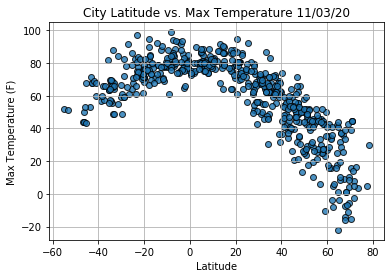

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


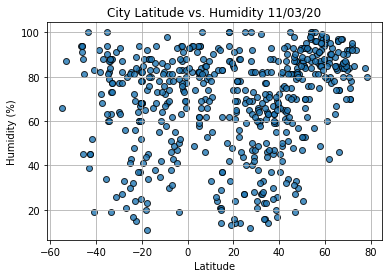

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

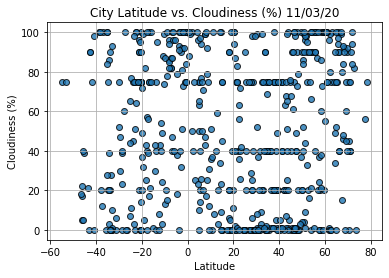

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

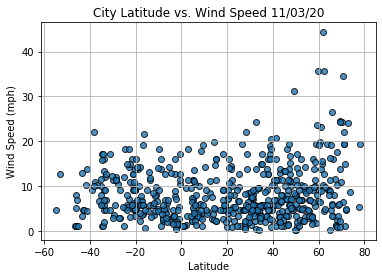

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [43]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2020-11-03 18:22:00
Lat                          42.1
Lng                        -79.24
Max Temp                    48.99
Humidity                       65
Cloudiness                     20
Wind Speed                  11.41
Name: 13, dtype: object

In [45]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
558     True
559    False
560     True
561    False
562     True
Name: Lat, Length: 563, dtype: bool

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Labuan,MY,2020-11-03 18:21:58,5.28,115.24,78.80,94,40,3.53
3,Sassandra,CI,2020-11-03 18:21:58,4.95,-6.08,80.19,80,0,7.34
6,Georgetown,MY,2020-11-03 18:21:59,5.41,100.34,77.00,94,20,4.70
9,Trincomalee,LK,2020-11-03 18:21:59,8.57,81.23,81.36,79,79,3.67
11,Sisimiut,GL,2020-11-03 18:22:00,66.94,-53.67,36.27,85,99,11.48


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

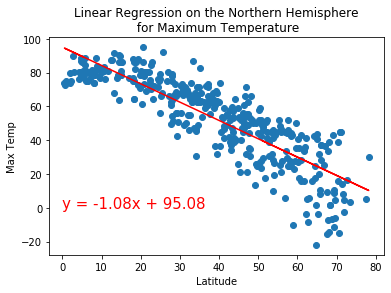

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(0,0))

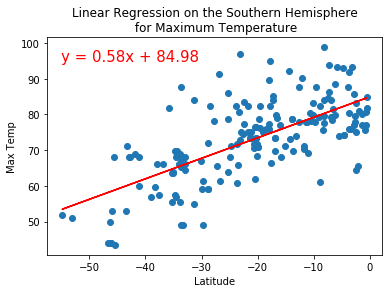

In [57]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-55,95))

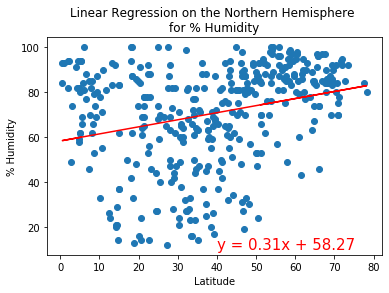

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

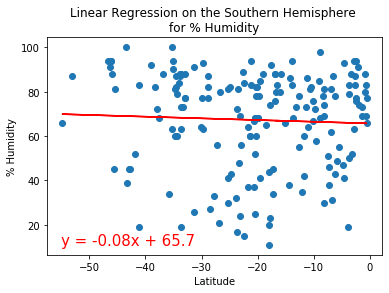

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-55,11))

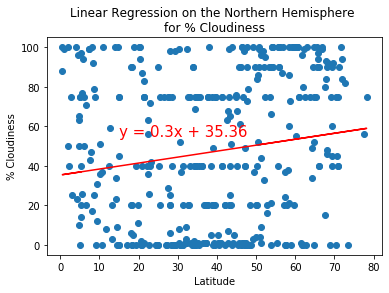

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(15,55))

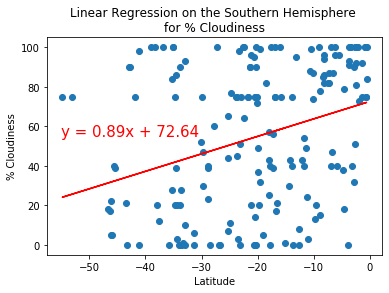

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,55))

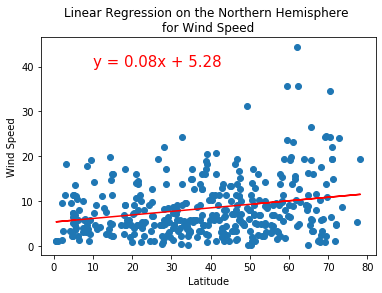

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,40))

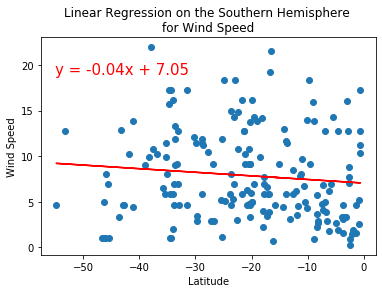

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-55,19))
